In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [42]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import glob, os
import seaborn as sns
import scipy

In [3]:
PATH = "data"

# Train Set Stats

In [96]:
cats = []
sizes = []
paths = []
dims = []
for d in os.listdir(f'{PATH}/train'):
    child_d = f'{PATH}/train/{d}'
    if os.path.isdir(child_d):
        imgs_in_child = len(os.listdir(child_d))
        cats.append(d)
        sizes.append(imgs_in_child)
        for img_n in os.listdir(child_d):
            img_d = f'{child_d}/{img_n}'
            try:
                img = Image.open(img_d)
                dims.append(img.size)
                paths.append(img_d)
            except:
                os.remove(img_d)

Text(0,0.5,'Size of each group')

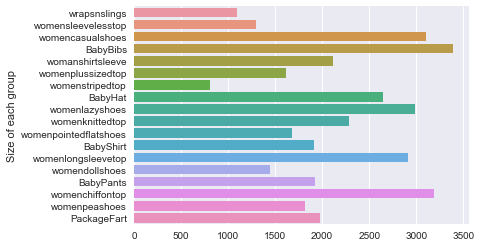

In [97]:
ax = sns.barplot(sizes, cats)
ax.set_ylabel('Size of each group')

As seen above, should do stratified split, womenstriped top is really small



In [102]:
# look at the heights & widths

print(f"no imgs: {len(dims)}")
l_h, l_w = 0, 0
s_h, s_w = math.inf, math.inf 
heights = [dim[0] for dim in dims]
widths = [dim[1] for dim in dims]

no imgs: 38211


In [139]:
h_args = np.argsort(heights)
w_args = np.argsort(widths)

print('Smallest imgs by height')
for i in h_args[:10]:
    print('H:', heights[i], paths[i])
    
print()
print('Smallest imgs by width')
for i in w_args[:10]:
    print('W:', widths[i], paths[i])

Smallest imgs by height
H: 4 data/train/womensleevelesstop/womensleevelesstop_1009.jpg
H: 35 data/train/womenlazyshoes/womenlazyshoes_2862.jpg
H: 37 data/train/womenpointedflatshoes/womenpointedflatshoes_1275.jpg
H: 40 data/train/womenlazyshoes/womenlazyshoes_1426.jpg
H: 41 data/train/womenlazyshoes/womenlazyshoes_2861.jpg
H: 45 data/train/womenpeashoes/womenpeashoes_645.jpg
H: 46 data/train/womencasualshoes/womencasualshoes_129.jpg
H: 46 data/train/womencasualshoes/womencasualshoes_127.jpg
H: 47 data/train/womenlazyshoes/womenlazyshoes_549.jpg
H: 47 data/train/womencasualshoes/womencasualshoes_1420.jpg

Smallest imgs by width
W: 2 data/train/womensleevelesstop/womensleevelesstop_1009.jpg
W: 24 data/train/womencasualshoes/womencasualshoes_125.jpg
W: 24 data/train/womencasualshoes/womencasualshoes_127.jpg
W: 25 data/train/womencasualshoes/womencasualshoes_122.jpg
W: 26 data/train/womencasualshoes/womencasualshoes_117.jpg
W: 26 data/train/womencasualshoes/womencasualshoes_131.jpg
W: 26 d

In [114]:
!open data/train/womensleevelesstop

Text(0.5,1,'Distribution of heights')

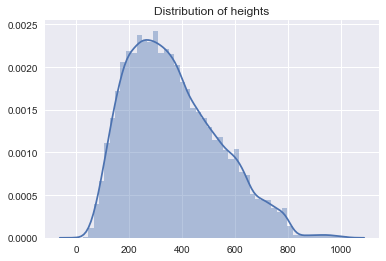

In [120]:
ax = sns.distplot(heights)
ax.set_title('Distribution of heights')

Text(0.5,1,'Distribution of widths')

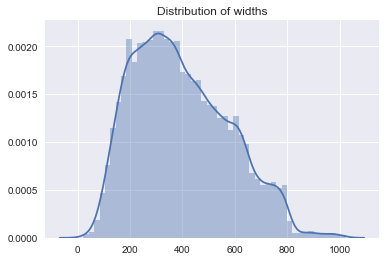

In [117]:
ax = sns.distplot(widths)
ax.set_title('Distribution of widths')

In [133]:
str_dims = [f'{dim[0]}_{dim[1]}' for dim in dims]
ctr = Counter(str_dims)
#print(ctr.values())
#print(ctr.keys())

# all imgs seem to have irregular size

# Test Set Stats

In [122]:
t_paths = []
t_dims = []
for d in glob.glob(f'{PATH}/test/*.jpg'):
    t_paths.append(d)
    img = Image.open(d)
    t_dims.append(img.size)

t_height = [dim[0] for dim in t_dims]
t_width = [dim[1] for dim in t_dims]

Text(0.5,1,'Distribution of test heights')

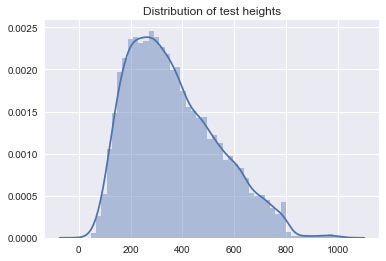

In [125]:
ax = sns.distplot(t_height)
ax.set_title('Distribution of test heights')

Text(0.5,1,'Distribution of test widths')

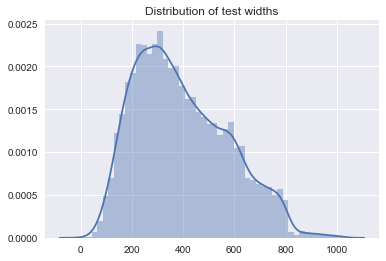

In [124]:
ax = sns.distplot(t_width)
ax.set_title('Distribution of test widths')